<a href="https://colab.research.google.com/github/urvog/fruits-ml/blob/main/Frutas_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tema 3. EJEMPLO BASICO DE MACHINE LEARNING

<img src="https://www.neuraldojo.org/media/fruits.jpg"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" width="600"/>
     
En este cuadernos vamos trabajar con un dataset simple para construir un  clasificador básico de frutas con machine learning utilizando la librería **Scikit-Learn.**

Para llevar a cabo este trabajo vamos a seguir los pasos básicos de una Pipeline de Machine Learning.

1. Importar el dataset
2. Preparamos los datos
3. Preparamos el modelo
4. Evaluamos el modelo
5. Probamos con nuevos datos

## 1.- Importación de las librerías y datos

In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

## 2.- Preparación de los datos

### 2.1 Inspeccionamos los datos

In [98]:
fruits.shape

(59, 7)

In [99]:
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [100]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

### 2.2 Manipulación de los datos

In [101]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [102]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


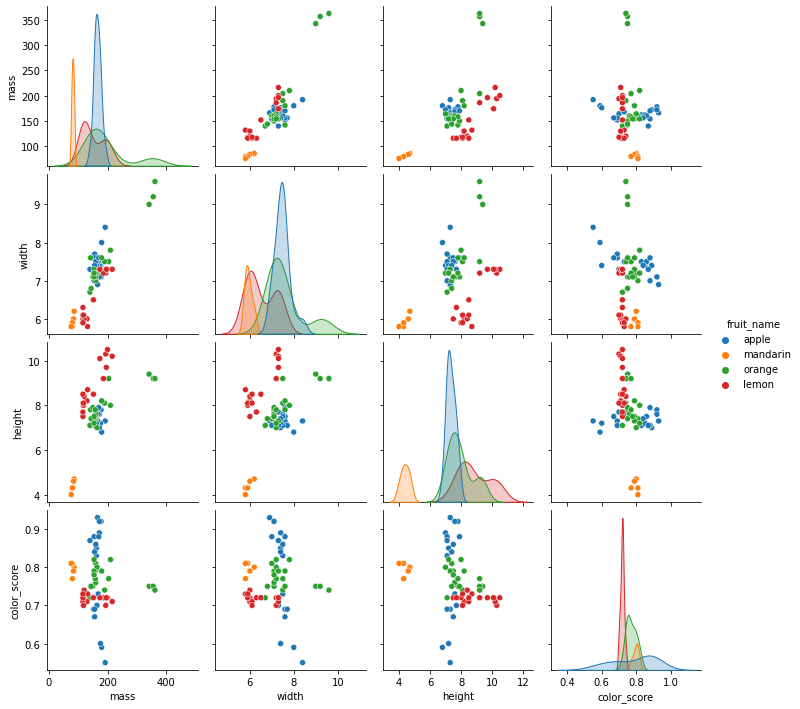

In [103]:
sns.pairplot(data=fruits[['mass','width','height','color_score','fruit_name']], hue='fruit_name')

### 2.3 Verificamos si existen datos faltantes

In [104]:
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

### 2.4 Verificamos la distribucion de los datos

In [105]:
fruits['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

### 2.4 Dividimos los datos en Entrenamiento y Test (Train-Split)


In [106]:
# Para este ejemplo, vamos a usar la masa, ancho y altura para cada fruta
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# Utilizaremos la division por defecto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3.- Preparamos el modelo

Por simplicidad vamos a emplear un KNN con K = 5

In [107]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

### 3.1 Entrenamos el clasificador utilizando los datos de entranamiento

In [108]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

## 4.- Evaluamos el Modelo

In [109]:
knn.score(X_test, y_test)

0.5333333333333333

## 5.- Probamos el modelo con nuevos datos

In [110]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm

new_data = {'mass': [9,180,120],
            'width': [4.3,5.5,6.7],
            'height': [5.5,4.5,2.6]}

df_new = pd.DataFrame(new_data)
df_new

,mass,width,height
0,9,4.3,5.5
1,180,5.5,4.5
2,120,6.7,2.6


In [111]:
fruit_prediction = knn.predict(df_new)

In [112]:
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [113]:
lookup_fruit_name[fruit_prediction[1]]

'apple'

In [114]:
lookup_fruit_name[fruit_prediction[2]]

'lemon'